## MULTIPLE LINEAR REGRESSION PROJECT

#### INTRODUCTION:

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
total_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


- DESCRIPTION AND TYPOLOGY OF VARIABLES:

age. Age of primary beneficiary (numeric)

sex. Gender of the primary beneficiary (categorical)

bmi. Body mass index (numeric)

children. Number of children/dependents covered by health insurance (numeric)

smoker. smoker (categorical)

region. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)

charges. Health insurance premium (numerical)


In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## UNIVARIANT ANALYSIS 

#### CATEGORIC

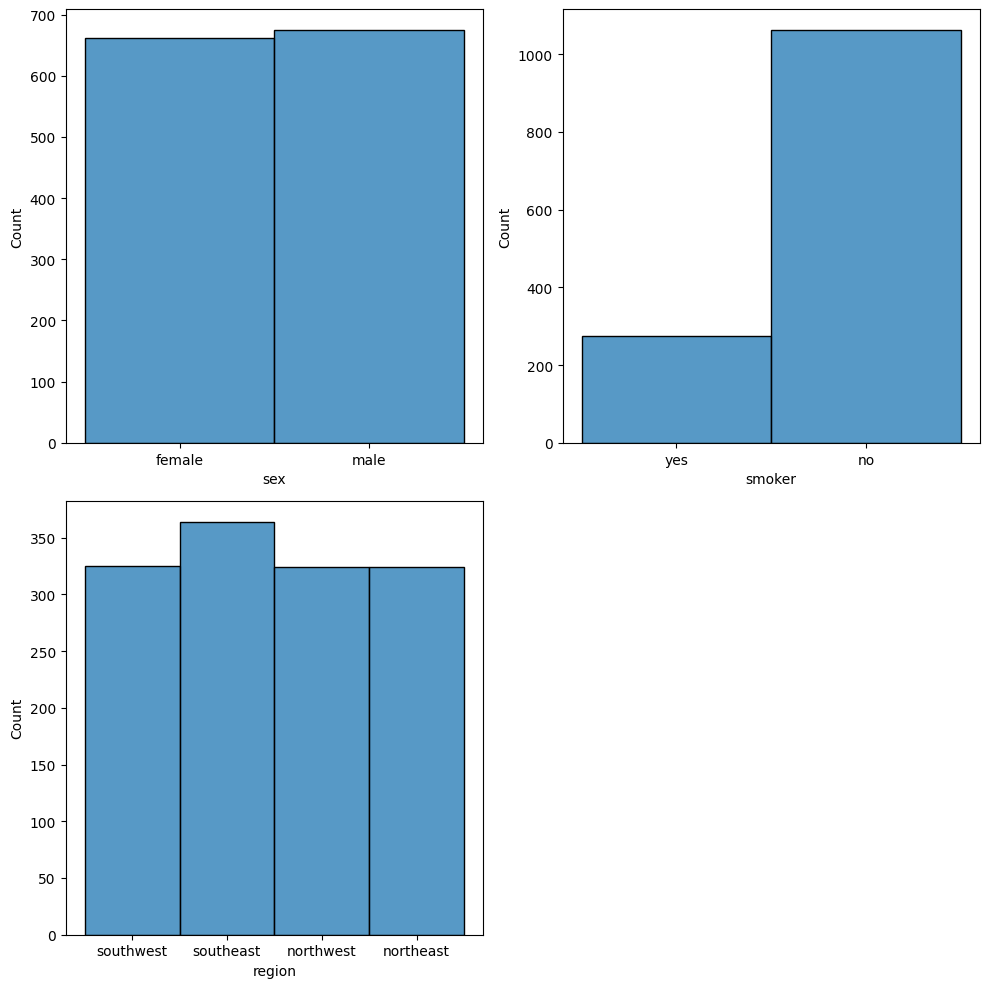

In [7]:
fig, axis = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(ax = axis [0,0], data = total_data, x = "sex")
sns.histplot(ax = axis [0,1], data = total_data, x = "smoker")
sns.histplot(ax = axis [1,0], data = total_data, x = "region")

fig.delaxes(axis[1,1])

plt.tight_layout()
plt.show()

* Very similar population concerning gender and region, but respectively, there are more men and people living in southeast
* Most don't smoke

#### NUMERIC

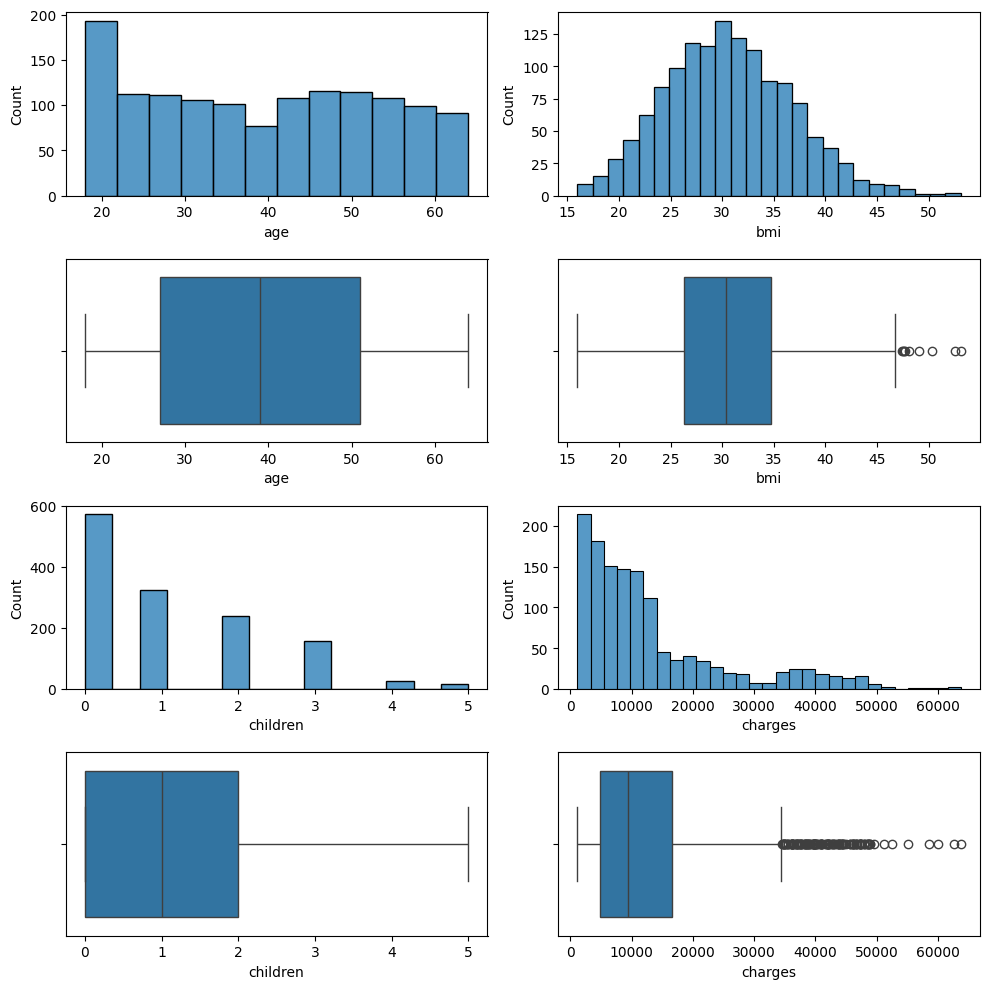

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")


plt.tight_layout()
plt.show()


- Age: most of the people is between 20 and 23 years old.
- BMI: most of the people has a 30 puntuation in his Body Mass Index. In this variable we can observe some outliers above 46 bmi.
- Children: mostly have no children or just 1, respectively.
- Charges: the variable with the most outliers. Most of all have a charge between 1.000 USD and 15.000 USD

## MULTIVARIANT ANALYSIS

In [9]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

total_data

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [10]:
total_data.drop_duplicates(["sex", "sex_n"])[["sex", "sex_n"]].to_excel("/workspaces/multiple-linear-regression-fertr98/data/raw/sex_to_sex_n.ipynb.xlsx", index = False)
total_data.drop_duplicates(["smoker", "smoker_n"])[["smoker", "smoker_n"]].to_excel("/workspaces/multiple-linear-regression-fertr98/data/raw/smoker_to_smoker_n.ipynb.xlsx", index = False)
total_data.drop_duplicates(["region", "region_n"])[["region", "region_n"]].to_excel("/workspaces/multiple-linear-regression-fertr98/data/raw/region_to_region_n.ipynb.xlsx", index = False)


#### NUMERIC-NUMERIC

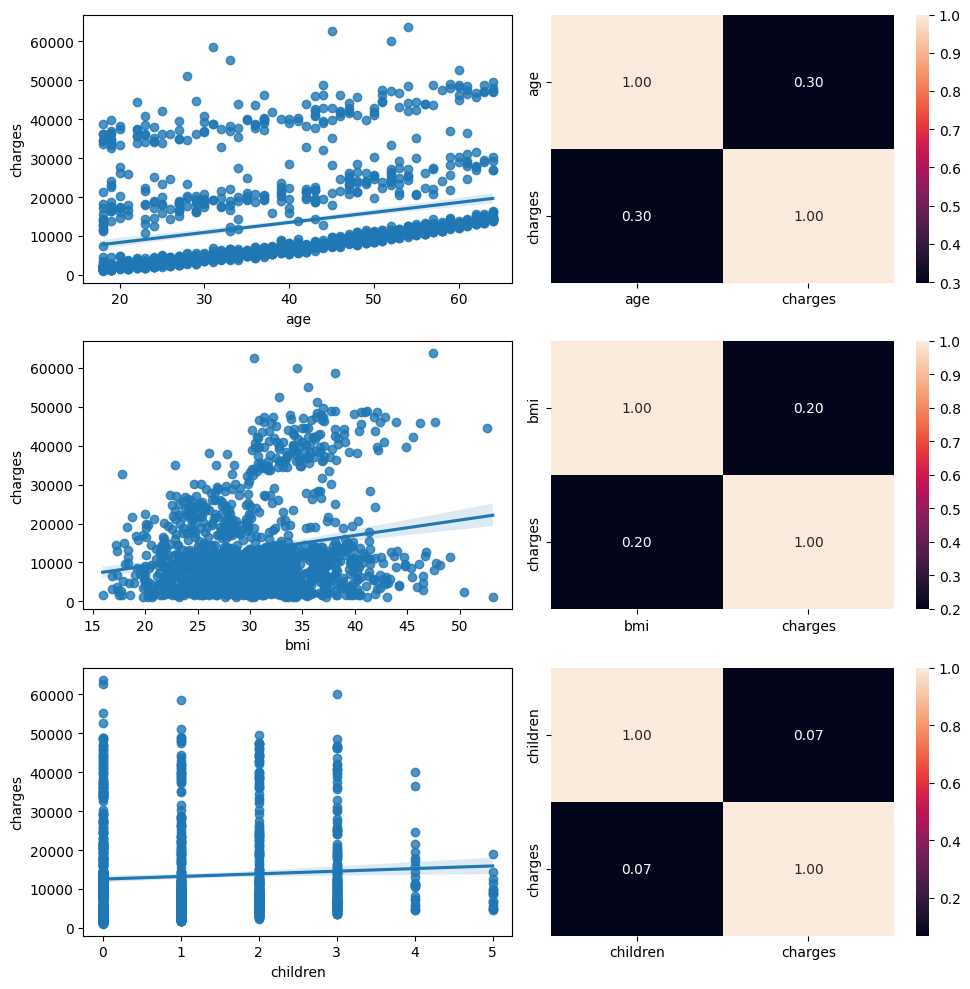

In [11]:
ig, axis = plt.subplots(3, 2, figsize = (10, 10))


sns.regplot(ax=axis[0,0], data= total_data, x= "age", y= "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot= True, fmt= ".2f", ax= axis[0,1])


sns.regplot(ax=axis[1,0], data= total_data, x= "bmi", y= "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot= True, fmt= ".2f", ax= axis[1,1])

sns.regplot(ax=axis[2,0], data= total_data, x= "children", y= "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot= True, fmt= ".2f", ax= axis[2,1])

plt.tight_layout()
plt.show()

- To the more age, bmi and children people have, the more is the charge of the health insurance

#### CATEGORIC-CATEGORIC

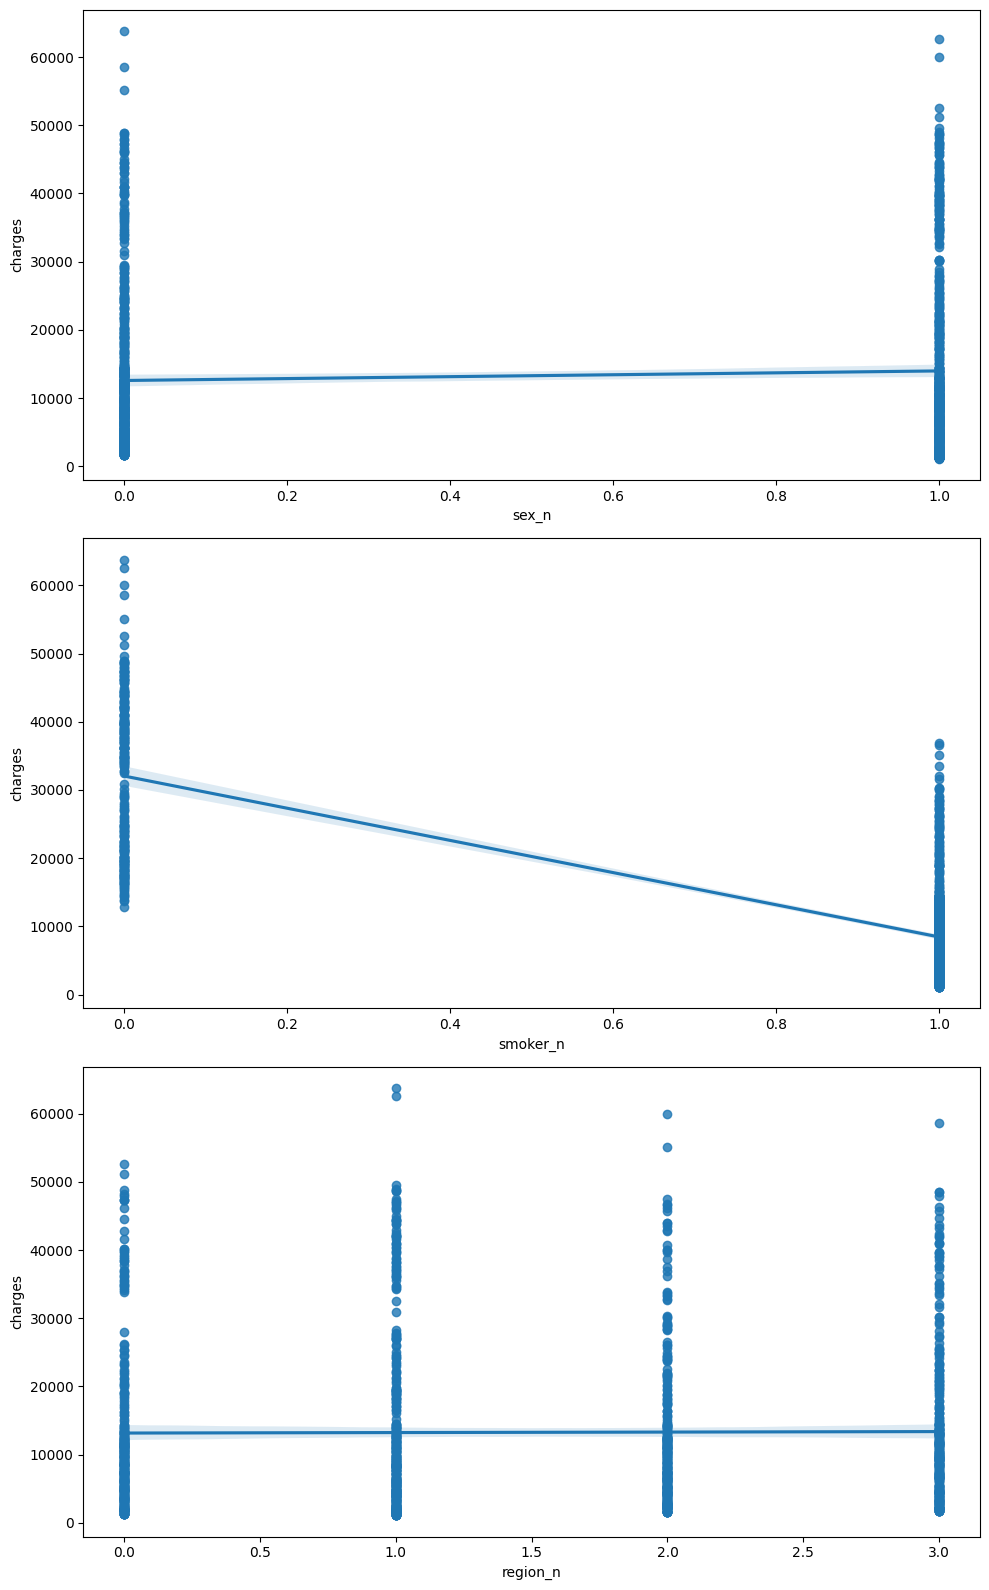

In [12]:
fig, axis = plt.subplots(3, figsize = (10, 16))

sns.regplot(data = total_data, x = "sex_n", y = "charges", ax = axis[0])
sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax= axis[1])
sns.regplot(data = total_data, x = "region_n", y = "charges", ax = axis[2])

plt.tight_layout()
plt.show()

- The most characteristic is that people who smoke, on average, have a higher cost in their health insurance.

#### CATEGORIC-NUMERIC

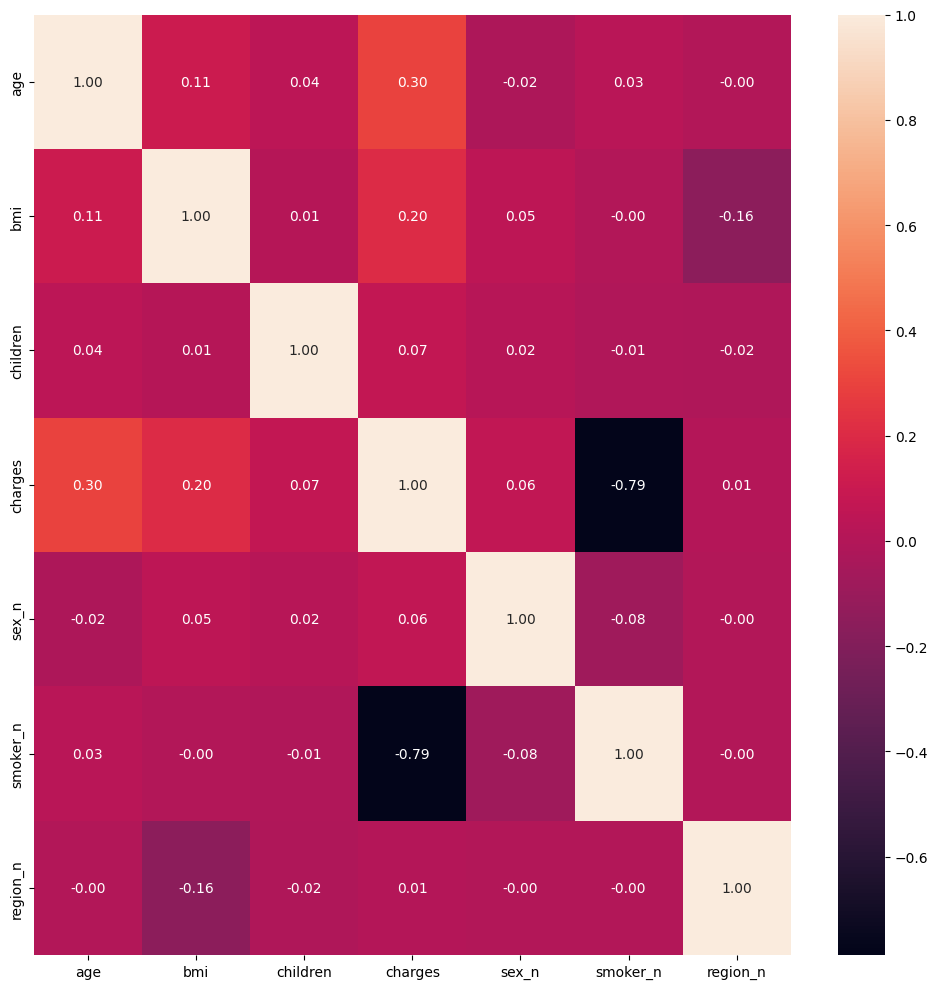

In [13]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- In resume, the correlation between our target variable('charges') and the predictor variables as: 'smoker', 'age', and 'bmi' is the higher among the other predictor variables. Actually, the highest correlation is between 'charges' and 'smoker'.

## FEATURE ENGINEERING

In [14]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


#### OUTLIER ANALYSIS

<Axes: ylabel='bmi'>

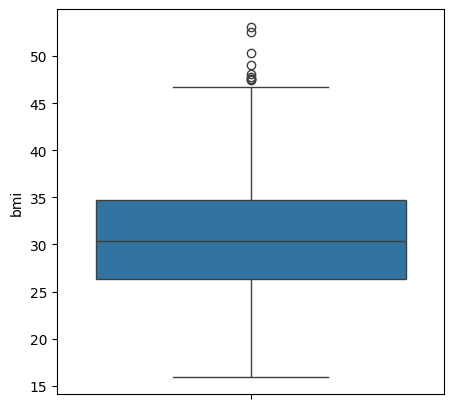

In [15]:
fig, axis = plt.subplots(1, figsize = (5, 5))

sns.boxplot(data = total_data, y = "bmi")

In [16]:
#data with outliers

outliers_data = total_data.copy()
no_outliers_data = total_data.copy()
outliers_data.head()


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


#### OUTLIERS IMPUTATION

In [17]:
describe_bmi = no_outliers_data['bmi'].describe()
describe_bmi

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [18]:
bmi_iqr = describe_bmi["75%"] - describe_bmi["25%"]
upper_limit = describe_bmi["75%"] + 1.5 * bmi_iqr
lower_limit = describe_bmi["25%"] - 1.5 * bmi_iqr
#lower_limit = 17
print(f"lower limit for finding outliers: {round(lower_limit, 2)} \nupper limit for finding outliers: {round(upper_limit, 2)}\nIQR: {round(bmi_iqr, 2)}")
bmi_outliers = no_outliers_data[no_outliers_data["bmi"] >= upper_limit]
bmi_outliers

lower limit for finding outliers: 13.67 
upper limit for finding outliers: 47.32
IQR: 8.41


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
116,58,male,49.06,0,no,southeast,11381.32540,1,1,1
286,46,female,48.07,2,no,northeast,9432.92530,0,1,3
401,47,male,47.52,1,no,southeast,8083.91980,1,1,1
543,54,female,47.41,0,yes,southeast,63770.42801,0,0,1
846,23,male,50.38,1,no,southeast,2438.05520,1,1,1
859,37,female,47.60,2,yes,southwest,46113.51100,0,0,0
1046,22,male,52.58,1,yes,southeast,44501.39820,1,0,1
1087,52,male,47.74,1,no,southeast,9748.91060,1,1,1
1316,18,male,53.13,0,no,southeast,1163.46270,1,1,1


In [19]:
#clean data without outliers
no_outliers_data['bmi'] = no_outliers_data['bmi'].apply(lambda x: 30.66 if x > 47.32 else x)
no_outliers_data

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,1,0


## FEATURE SCALING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


predictors = ['age', 'bmi', 'children', 'sex_n',  'smoker_n', 'region_n']
target = 'charges'

X = outliers_data[predictors]
y = outliers_data[target]

#data with outliers no scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#scaled data 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictors)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictors)


#normalized data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictors)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictors)


In [21]:
X_train.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,23,24.510,0,1,1,3
967,21,25.745,2,1,1,3
598,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


In [22]:
X_train_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,0.108696,0.230024,0.0,1.0,1.0,1.000000
967,0.065217,0.263250,0.4,1.0,1.0,1.000000
598,0.739130,0.580172,0.4,0.0,1.0,0.666667
170,0.978261,0.686306,0.0,1.0,1.0,0.333333
275,0.630435,0.286252,0.4,0.0,1.0,1.000000


In [23]:
X_train_norm.head()


,age,bmi,children,sex_n,smoker_n,region_n
1113,-1.157680,-0.996928,-0.907908,0.971409,0.500292,1.383946
967,-1.300619,-0.792762,0.766904,0.971409,0.500292,1.383946
598,0.914926,1.154664,0.766904,-1.029432,0.500292,0.477983
170,1.701087,1.806837,-0.907908,0.971409,0.500292,-0.427981
275,0.557580,-0.651417,0.766904,-1.029432,0.500292,1.383946


#### data without outliers, scaled and normalized

In [24]:
#data without outliers no scaled
predictors1 = ['age', 'bmi', 'children', 'sex_n',  'smoker_n', 'region_n']
target1 = 'charges'

X = no_outliers_data[predictors1]
y = no_outliers_data[target1]

X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(X, y, test_size = 0.2, random_state = 42)

#data with outliers scaled MinMax

scaler = MinMaxScaler()
scaler.fit(X_train_no_out)

X_train_no_out_scal = scaler.transform(X_train_no_out)
X_train_no_out_scal = pd.DataFrame(X_train_no_out_scal, index = X_train_no_out.index, columns = predictors1)

X_test_no_out_scal = scaler.transform(X_test_no_out)
X_test_no_out_scal = pd.DataFrame(X_test_no_out_scal, index = X_test_no_out.index, columns = predictors1)

#data without outliers normalized

scaler = StandardScaler()
scaler.fit(X_train_no_out)

X_train_no_out_norm = scaler.transform(X_train_no_out)
X_train_no_out_norm = pd.DataFrame(X_train_no_out_norm, index = X_train_no_out.index, columns = predictors1)

X_test_no_out_norm = scaler.transform(X_test_no_out)
X_test_no_out_norm = pd.DataFrame(X_test_norm, index = X_test_no_out.index, columns = predictors1)

In [25]:
X_train_no_out.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,23,24.510,0,1,1,3
967,21,25.745,2,1,1,3
598,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


In [26]:
X_train_no_out_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,0.108696,0.278139,0.0,1.0,1.0,1.000000
967,0.065217,0.318315,0.4,1.0,1.0,1.000000
598,0.739130,0.701529,0.4,0.0,1.0,0.666667
170,0.978261,0.829863,0.0,1.0,1.0,0.333333
275,0.630435,0.346129,0.4,0.0,1.0,1.000000


In [27]:
X_train_no_out_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1113,-1.157680,-1.009437,-0.907908,0.971409,0.500292,1.383946
967,-1.300619,-0.798906,0.766904,0.971409,0.500292,1.383946
598,0.914926,1.209230,0.766904,-1.029432,0.500292,0.477983
170,1.701087,1.881735,-0.907908,0.971409,0.500292,-0.427981
275,0.557580,-0.653155,0.766904,-1.029432,0.500292,1.383946


In [28]:
X_train.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_with_outliers_no_scaled.xlsx", index = False)
X_train_scal.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_with_outliers_scaled.xlsx", index = False)
X_train_norm.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_with_outliers_norm.xlsx", index = False)

X_train_no_out.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_no_outliers_no_scaled.xlsx", index = False)
X_train_no_out_scal.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_no_outliers_scaled.xlsx", index = False)
X_train_no_out_norm.to_excel("/workspaces/multiple-linear-regression-fertr98/data/processed/data_no_outliers_norm.xlsx", index = False)


#### FEATURE SELECTION

In [29]:
from sklearn.feature_selection import f_regression, SelectKBest

#select features in data with outliers

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

#select features in data with outliers scaled

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train.columns.values[ix])
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test.columns.values[ix])

#select features in data with outliers normalized

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_norm_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train.columns.values[ix])
X_test_norm_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test.columns.values[ix])

#select features in data without outliers 

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_no_out, y_train_no_out)
ix = selection_model.get_support()
X_train_no_out_sel = pd.DataFrame(selection_model.transform(X_train_no_out), columns = X_train_no_out.columns.values[ix])
X_test_no_out_sel = pd.DataFrame(selection_model.transform(X_test_no_out), columns = X_test_no_out.columns.values[ix])

#select features in data without outliers scaled

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_no_out_scal, y_train_no_out)
ix = selection_model.get_support()
X_train_no_out_scal_sel = pd.DataFrame(selection_model.transform(X_train_no_out_scal), columns = X_train_no_out.columns.values[ix])
X_test_no_out_scal_sel = pd.DataFrame(selection_model.transform( X_test_no_out_scal), columns = X_test_no_out.columns.values[ix])

#select features in data without outliers normalized

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train_no_out_norm, y_train_no_out)
ix = selection_model.get_support()
X_train_no_out_norm_sel = pd.DataFrame(selection_model.transform(X_train_no_out_norm), columns = X_train_no_out.columns.values[ix])
X_test_no_out_norm_sel = pd.DataFrame(selection_model.transform( X_test_no_out_norm), columns = X_test_no_out.columns.values[ix])



## INITIALIZATION AND TRAINNING THE MODEL

In [30]:
from sklearn.linear_model import LinearRegression

#data with outliers
model = LinearRegression()
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)


#data with outliers scaled

model = LinearRegression()
model.fit(X_train_scal_sel, y_train)

y_pred1 = model.predict(X_test_scal_sel)


#data with outliers normalized

model = LinearRegression()
model.fit(X_train_norm_sel, y_train)

y_pred2 = model.predict(X_test_norm_sel)

#data without outliers

model = LinearRegression()
model.fit(X_train_no_out_sel, y_train)

y_pred3 = model.predict(X_test_no_out_sel)

#data without outliers scaled

model = LinearRegression()
model.fit(X_train_no_out_scal_sel, y_train)

y_pred4 = model.predict(X_test_no_out_scal_sel)


#data without outliers normalized

model = LinearRegression()
model.fit(X_train_no_out_norm_sel, y_train)

y_pred5 = model.predict(X_test_no_out_sel)


## MODEL METRICS

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Data with outliers metrics \nMSE: {mean_squared_error(y_test, y_pred)} \nR2 Score: {r2_score(y_test, y_pred)}")

print(f"Data with outliers scaled metrics \nMSE: {mean_squared_error(y_test, y_pred1)} \nR2 Score: {r2_score(y_test, y_pred1)}")

print(f"Data with outliers normalized metrics \nMSE: {mean_squared_error(y_test, y_pred2)} \nR2 Score: {r2_score(y_test, y_pred2)}")

print(f"Data without outliers metrics \nMSE: {mean_squared_error(y_test, y_pred3)} \nR2 Score: {r2_score(y_test, y_pred3)}")

print(f"Data without outliers scaled metrics \nMSE: {mean_squared_error(y_test, y_pred4)} \nR2 Score: {r2_score(y_test, y_pred4)}")

print(f"Data without outliers normalized metrics \nMSE: {mean_squared_error(y_test, y_pred5)} \nR2 Score: {r2_score(y_test, y_pred5)}")


Data with outliers metrics 
MSE: 35901914.11461986 
R2 Score: 0.8046218811772659
Data with outliers scaled metrics 
MSE: 35901914.11461985 
R2 Score: 0.8046218811772659
Data with outliers normalized metrics 
MSE: 35901914.11461984 
R2 Score: 0.804621881177266
Data without outliers metrics 
MSE: 37176740.609509595 
R2 Score: 0.7976842788644267
Data without outliers scaled metrics 
MSE: 37176740.609509595 
R2 Score: 0.7976842788644267
Data without outliers normalized metrics 
MSE: 37040315981.02166 
R2 Score: -200.57329867893296


## Best model is with data with outliers normalized (R2 Score: 0.804621881177266)

## save the model

In [ ]:
dump(lasso_model, open("/workspaces/multiple-linear-regression-fertr98/models/multiple_linear_regression.sav", "wb"))
